# P-Chart

While the I-MR chart can be used for a variety of data types, it is especially intended 
for continuous data. However, when other data types are used, other charts are better 
suited. Such an example is for proportional data, where the P-chart is recommended. 
Proportions are common for such things as yield or scrap.

In [1]:
import pandas as pd
import numpy as np
from stats_plots import p_chart
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
# Replace with your actual Excel path/sheet
xls = pd.ExcelFile("Six Sigma_Case Study.xlsx")
df = (
    pd.read_excel(
        xls,
        sheet_name="Control Charts",
        usecols = ["Month", "Cars Produced", "WarRec"]
    )
    .dropna(how="all")  # drop rows where all columns are NaN
)
df.columns = df.columns.str.strip()
df.head()

,Month,Cars Produced,WarRec
0,2018-01-01,1013.0,192.0
1,2018-02-01,992.0,195.0
2,2018-03-01,960.0,191.0
3,2018-04-01,996.0,207.0
4,2018-05-01,983.0,194.0


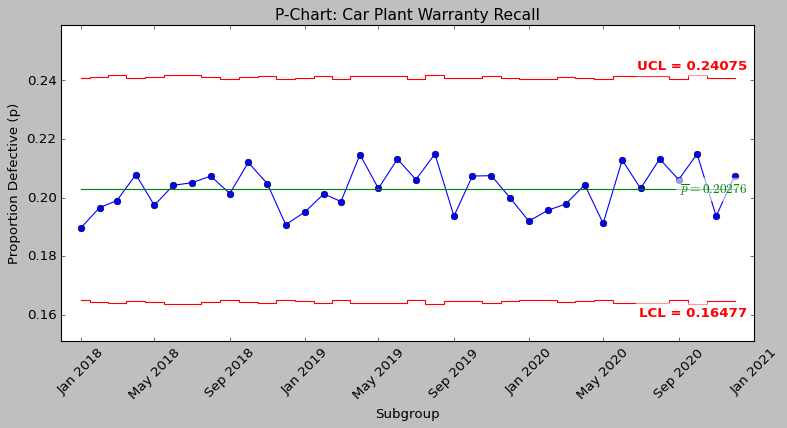

In [3]:
p_chart(
    defects=df["WarRec"],
    subgroup_size=df["Cars Produced"],
    time_stamp=df["Month"],
    title="Car Plant Warranty Recall"
)
#plt.show()

The core revision to the control chart plotting code was switching from the global `plt.` functions to the more robust, object-oriented `fig, ax` style. The main functional improvement involved using the special `ax.get_yaxis_transform()` method within `ax.text()` to reliably anchor the control limit labels (like UCL, $\bar{p}$, and LCL) to the right edge of the chart, ensuring they display correctly regardless of the plot's X-axis scale, and this standardization was applied consistently across the P-Chart, Individuals Chart, and Moving Range Chart.

## Data Correction Statement:
During the initial analysis, a discrepancy was observed between the Python-calculated p-chart statistics and the Minitab output. Upon investigation, it was determined that the raw data column labeled “WarRec per 1000” had been misinterpreted — the values were intended to represent the actual number of WarRec items per subgroup, but the label suggested otherwise. After verifying the raw data and confirming that the integers correspond to WarRec counts, the column label was corrected, and the analysis was rerun. With this correction, the Python results for the overall proportion defective ($\bar{p}$) and control limits now match the Minitab results, confirming the accuracy of the analysis.